# Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DF_chrome = pd.read_csv('dataset/chrome.csv',header=[0])
DF_firefox = pd.read_csv('dataset/firefox.csv',header=[0])
DF_dns2tcp = pd.read_csv('dataset/dns2tcp.csv',header=[0])
DF_dnscat2 = pd.read_csv('dataset/dnscat2.csv',header=[0])
DF_iodine = pd.read_csv('dataset/iodine.csv',header=[0])

In [2]:
DF_chrome.head()
# print(DF_chrome['SourceIP'].dtypes)


,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,4.544040,11256331,2.477164e+06,159324,35062.191354,...,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,False
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,8.171041,930,1.138166e+02,11936,1460.768585,...,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,False
2,192.168.20.191,96.17.115.57,51021,443,2020-01-14 15:49:03,0.033776,162,4.796305e+03,138,4085.741355,...,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,False
3,192.168.20.191,96.114.14.140,50308,443,2020-01-14 15:49:03,0.060723,108,1.778568e+03,120,1976.186947,...,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000,False
4,192.168.20.191,23.78.199.198,50983,443,2020-01-14 15:49:03,0.019545,55,2.814019e+03,66,3376.822717,...,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000,False


In [3]:
#Randomly pick 5% of each data
DF_chrome = DF_chrome.sample(n=None, frac=0.05, replace=False, weights=None, random_state=991, axis=None)
DF_firefox = DF_firefox.sample(n=None, frac=0.05, replace=False, weights=None, random_state=991, axis=None)
DF_dns2tcp = DF_dns2tcp.sample(n=None, frac=0.05, replace=False, weights=None, random_state=991, axis=None)
DF_dnscat2 = DF_dnscat2.sample(n=None, frac=0.05, replace=False, weights=None, random_state=991, axis=None)
DF_iodine = DF_iodine.sample(n=None, frac=0.05, replace=False, weights=None, random_state=991, axis=None)

In [4]:
DF_chrome = DF_chrome.drop(['ResponseTimeTimeMedian','ResponseTimeTimeSkewFromMedian'], axis=1)
DF_firefox = DF_firefox.drop(['ResponseTimeTimeMedian','ResponseTimeTimeSkewFromMedian'], axis=1)
DF_dns2tcp = DF_dns2tcp.drop(['ResponseTimeTimeMedian','ResponseTimeTimeSkewFromMedian'], axis=1)
DF_dnscat2 = DF_dnscat2.drop(['ResponseTimeTimeMedian','ResponseTimeTimeSkewFromMedian'], axis=1)
DF_iodine = DF_iodine.drop(['ResponseTimeTimeMedian','ResponseTimeTimeSkewFromMedian'], axis=1)

In [5]:
# Count how many 'False' in Column'DoH' for each DataFrame
# true_count = (DF_iodine['DoH']).value_counts()[False]
# print(true_count)

# Split Holdout Data

In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [7]:
Y_chrome = DF_chrome['DoH'] #choose the target attribute and set into Y
X_chrome = DF_chrome.drop('DoH', axis =1) #Save into X for the rest of attributes besieds class(target attribute)
Y_firefox = DF_firefox['DoH'] 
X_firefox = DF_firefox.drop('DoH', axis =1) 
Y_dns2tcp = DF_dns2tcp['DoH'] 
X_dns2tcp = DF_dns2tcp.drop('DoH', axis =1) 
Y_dnscat2 = DF_dnscat2['DoH'] 
X_dnscat2 = DF_dnscat2.drop('DoH', axis =1) 
Y_iodine = DF_iodine['DoH'] 
X_iodine = DF_iodine.drop('DoH', axis =1) 


In [8]:
X_chrome_training, X_chrome_testing, Y_chrome_training, Y_chrome_testing = train_test_split(X_chrome, Y_chrome, test_size= 0.3, stratify = Y_chrome, random_state = 1, shuffle = True)
X_firefox_training, X_firefox_testing, Y_firefox_training, Y_firefox_testing = train_test_split(X_firefox, Y_firefox, test_size= 0.3, stratify = Y_firefox, random_state = 1, shuffle = True)  
X_dns2tcp_training, X_dns2tcp_testing, Y_dns2tcp_training, Y_dns2tcp_testing = train_test_split(X_dns2tcp, Y_dns2tcp, test_size= 0.3, stratify = Y_dns2tcp, random_state = 1, shuffle = True)  
X_dnscat2_training, X_dnscat2_testing, Y_dnscat2_training, Y_dnscat2_testing = train_test_split(X_dnscat2, Y_dnscat2, test_size= 0.3, stratify = Y_dnscat2, random_state = 1, shuffle = True)  
X_iodine_training, X_iodine_testing, Y_iodine_training, Y_iodine_testing = train_test_split(X_iodine, Y_iodine, test_size= 0.3, stratify = Y_iodine, random_state = 1, shuffle = True)  


In [9]:
DF_X_training = X_chrome_training.append(X_firefox_training).append(X_dns2tcp_training).append(X_dnscat2_training).append(X_iodine_training)
DF_X_testing = X_chrome_testing.append(X_firefox_testing).append(X_dns2tcp_testing).append(X_dnscat2_testing).append(X_iodine_testing)
DF_Y_training = Y_chrome_training.append(Y_firefox_training).append(Y_dns2tcp_training).append(Y_dnscat2_training).append(Y_iodine_training)
DF_Y_testing = Y_chrome_testing.append(Y_firefox_testing).append(Y_dns2tcp_testing).append(Y_dnscat2_testing).append(Y_iodine_testing)


### Training set(70%) & Testing set(30%)

In [10]:
print(DF_X_training.shape[0])
print(DF_X_testing.shape[0])
print(DF_Y_training.shape[0])
print(DF_Y_testing.shape[0])

40854
17510
40854
17510


In [11]:
# DF_X_training = DF_X_training.drop(['TimeStamp'], axis=1)
# DF_X_testing = DF_X_testing.drop(['TimeStamp'], axis=1)

#### Columns' Value Convertsion

In [12]:
import socket, struct
from datetime import datetime

def ip2int(ip):
    """
    Convert an IP string to int
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

ip2int('0.0.0.0')
ip2int('255.255.255.255') # 256*256*256*256 = 4294967295
# http://www.aboutmyip.com/AboutMyXApp/IP2Integer.jsp?ipAddress=72.21.91.42

4294967295

In [13]:
# SourceIP & DestinationIP to int
# DF_chrome['SourceIP'][0]=ip2bin(DF_chrome['SourceIP'][0])
DF_X_training['SourceIP'] = DF_X_training.SourceIP.apply(ip2int)
DF_X_testing['SourceIP'] = DF_X_testing.SourceIP.apply(ip2int)
DF_X_training['DestinationIP'] = DF_X_training.DestinationIP.apply(ip2int)
DF_X_testing['DestinationIP'] = DF_X_testing.DestinationIP.apply(ip2int)
DF_X_training['TimeStamp'] = pd.to_datetime(DF_X_training['TimeStamp'], format='%Y-%m-%d %H:%M:%S')
DF_X_testing['TimeStamp'] = pd.to_datetime(DF_X_testing['TimeStamp'], format='%Y-%m-%d %H:%M:%S')
DF_X_training['TimeStamp'] = DF_X_training['TimeStamp'].apply(lambda x: x.value)
DF_X_testing['TimeStamp'] = DF_X_testing['TimeStamp'].apply(lambda x: x.value)

In [14]:
#checking if columns droped
DF_X_training.head() 

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
193732,3232240831,1752940638,62295,443,1578798394000000000,0.094575,1203,12720.063442,5046,53354.480571,...,0.000000,0.063294,2.417188,0.413704,1.571202e-04,0.012535,0.013430,0.000039,1.068309,0.933340
147615,3232240831,3092729903,50073,443,1578799478000000000,11.678444,958,82.031476,513,43.927085,...,0.000000,2.362837,0.797363,1.254133,3.806617e-04,0.019511,0.023639,0.000044,1.209335,0.825361
328853,3232240831,1746603361,54317,443,1579026163000000000,3.414565,3291,963.812374,72174,21137.099455,...,0.548099,-2.072556,1.212697,0.625667,7.638298e-03,0.087397,0.031721,0.000041,0.362483,2.755185
439790,3232240831,600397031,56048,443,1578968174000000000,0.025345,108,4261.195502,60,2367.330834,...,0.000000,-2.118934,1.414213,0.707107,0.000000e+00,0.000000,0.025326,0.025326,-10.000000,0.000000
22866,3232240831,1589019664,61392,443,1579021877000000000,20.289574,271,13.356614,271,13.356614,...,0.000000,-1.560732,1.880769,0.531697,7.216502e-07,0.000849,0.167638,0.166789,1.000000,0.005067


In [15]:
#Check for NaN under an entire DataFrame
#df.isnull().values.any()

#Count the NaN under an entire DataFrame
#df.isnull().sum().sum() 

In [16]:
#Checking how many 'Nan' Values are in the dataset
DF_X_training.isnull().values.any()
DF_X_training.isnull().sum().sum() 

0

In [17]:
#Checking how many 'Nan' Values are in the dataset
DF_X_testing.isnull().values.any()
DF_X_testing.isnull().sum().sum() 

0

In [18]:
# Replace 'Nan' values with Zeros 
# DF_X_training = DF_X_training.replace(np.nan,0)
# DF_X_testing = DF_X_testing.replace(np.nan,0)

In [19]:
DF_X_training

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
193732,3232240831,1752940638,62295,443,1578798394000000000,0.094575,1203,12720.063442,5046,53354.480571,...,0.000000,0.063294,2.417188,0.413704,1.571202e-04,0.012535,0.013430,0.000039,1.068309,0.933340
147615,3232240831,3092729903,50073,443,1578799478000000000,11.678444,958,82.031476,513,43.927085,...,0.000000,2.362837,0.797363,1.254133,3.806617e-04,0.019511,0.023639,0.000044,1.209335,0.825361
328853,3232240831,1746603361,54317,443,1579026163000000000,3.414565,3291,963.812374,72174,21137.099455,...,0.548099,-2.072556,1.212697,0.625667,7.638298e-03,0.087397,0.031721,0.000041,0.362483,2.755185
439790,3232240831,600397031,56048,443,1578968174000000000,0.025345,108,4261.195502,60,2367.330834,...,0.000000,-2.118934,1.414213,0.707107,0.000000e+00,0.000000,0.025326,0.025326,-10.000000,0.000000
22866,3232240831,1589019664,61392,443,1579021877000000000,20.289574,271,13.356614,271,13.356614,...,0.000000,-1.560732,1.880769,0.531697,7.216502e-07,0.000849,0.167638,0.166789,1.000000,0.005067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37301,3232240849,2959573634,52624,443,1584899208000000000,120.574096,20584,170.716602,25680,212.981070,...,0.000000,-0.085007,1.722749,0.580467,8.228475e-02,0.286853,0.180318,0.026650,0.535702,1.590819
43472,16843009,3232240850,443,39708,1584863331000000000,120.580390,46217,383.287863,26860,222.755956,...,0.000000,-0.005346,1.742527,0.573879,2.369465e-01,0.486771,0.432763,0.000021,0.889004,1.124799
44973,3232240784,16843009,48370,443,1584918031000000000,106.472469,23114,217.088983,82846,778.097857,...,0.000000,-0.251844,1.595756,0.626662,1.098415e-04,0.010481,0.010443,0.000005,0.995897,1.003639
2595,3232240845,134743044,39398,443,1584615644000000000,97.509752,497258,5099.571989,934236,9580.949401,...,53.967395,-0.155151,-0.170491,0.586748,3.331546e-04,0.018253,0.009429,0.000115,0.510289,1.935771


In [20]:
DF_X_testing

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
157837,3232240831,65041976,53994,443,1578801198000000000,0.028133,55,1954.999467,66,2345.999360,...,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.028133,0.028133,-10.000000,0.000000
541816,3232240831,1249711261,51829,443,1578917769000000000,11.265086,1073,95.250050,1724,153.039222,...,0.000000,-0.004770,1.013771,0.986416,1.587051e-03,0.039838,0.056338,0.000032,1.413381,0.707121
210441,3232240831,2891780616,52953,443,1578912709000000000,0.099159,1195,12051.351869,3662,36930.586230,...,0.099139,-1.116705,-0.898793,0.511150,3.532075e-05,0.005943,0.009254,0.000044,1.549622,0.642250
287456,3232240831,2915778088,63560,443,1578816371000000000,16.988832,7090,417.332987,45329,2668.164592,...,0.272579,1.098260,0.373248,2.322770,9.374680e+00,3.061810,0.906949,0.000028,0.296204,3.375945
297142,3232240831,2899905954,54509,443,1578819215000000000,5.750447,1978,343.973260,2329,405.011993,...,0.128624,1.106619,0.359132,2.336595,1.469699e-04,0.012123,0.022104,0.000041,1.819947,0.548447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,16843009,3232240845,443,43726,1584797017000000000,120.203489,149270,1241.810876,37488,311.871147,...,0.000000,-0.288293,1.946580,0.513722,2.085541e-01,0.456677,0.316328,0.000003,0.692667,1.443681
23909,2959573634,3232240848,443,37118,1584879379000000000,120.739100,93727,776.277113,44704,370.252884,...,0.000000,-0.044929,1.707488,0.585656,1.402289e-01,0.374471,0.187517,0.000017,0.500705,1.997001
40484,3232240784,16843009,46056,443,1584850151000000000,105.742965,448,4.236688,496,4.690619,...,0.000000,0.000001,1.527742,0.654561,1.076484e-09,0.000033,0.015010,0.014959,1.542983,0.002186
37580,16843009,3232240784,443,47258,1584885393000000000,15.104108,124,8.209687,56,3.707601,...,0.000000,-2.118158,1.414213,0.707107,0.000000e+00,0.000000,15.089109,15.089109,-10.000000,0.000000


# Decision Tree

In [21]:
classifier_DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth = 12, min_samples_split=2)
#classifier_gini = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth = 3)

In [22]:
DF_X_testing.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
157837,3232240831,65041976,53994,443,1578801198000000000,0.028133,55,1954.999467,66,2345.999360,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.028133,0.028133,-10.000000,0.000000
541816,3232240831,1249711261,51829,443,1578917769000000000,11.265086,1073,95.250050,1724,153.039222,...,0.000000,-0.004770,1.013771,0.986416,0.001587,0.039838,0.056338,0.000032,1.413381,0.707121
210441,3232240831,2891780616,52953,443,1578912709000000000,0.099159,1195,12051.351869,3662,36930.586230,...,0.099139,-1.116705,-0.898793,0.511150,0.000035,0.005943,0.009254,0.000044,1.549622,0.642250
287456,3232240831,2915778088,63560,443,1578816371000000000,16.988832,7090,417.332987,45329,2668.164592,...,0.272579,1.098260,0.373248,2.322770,9.374680,3.061810,0.906949,0.000028,0.296204,3.375945
297142,3232240831,2899905954,54509,443,1578819215000000000,5.750447,1978,343.973260,2329,405.011993,...,0.128624,1.106619,0.359132,2.336595,0.000147,0.012123,0.022104,0.000041,1.819947,0.548447


In [23]:
classifier_DT.fit(DF_X_training, DF_Y_training) #training the classifier by gini index

DecisionTreeClassifier(max_depth=12)

In [24]:
Y_DT_predictions = classifier_DT.predict(DF_X_testing) #for gini index
# print(Y_predictions_gini_testing)

In [25]:
print(confusion_matrix(Y_DT_predictions, DF_Y_testing)) #set confusion matrix with Y_predictions_gini_train by gini and Y_train


[[13472     6]
 [    9  4023]]


In [26]:
print("Accuracy:", classifier_DT.score(DF_X_testing, DF_Y_testing))

Accuracy: 0.999143346659052


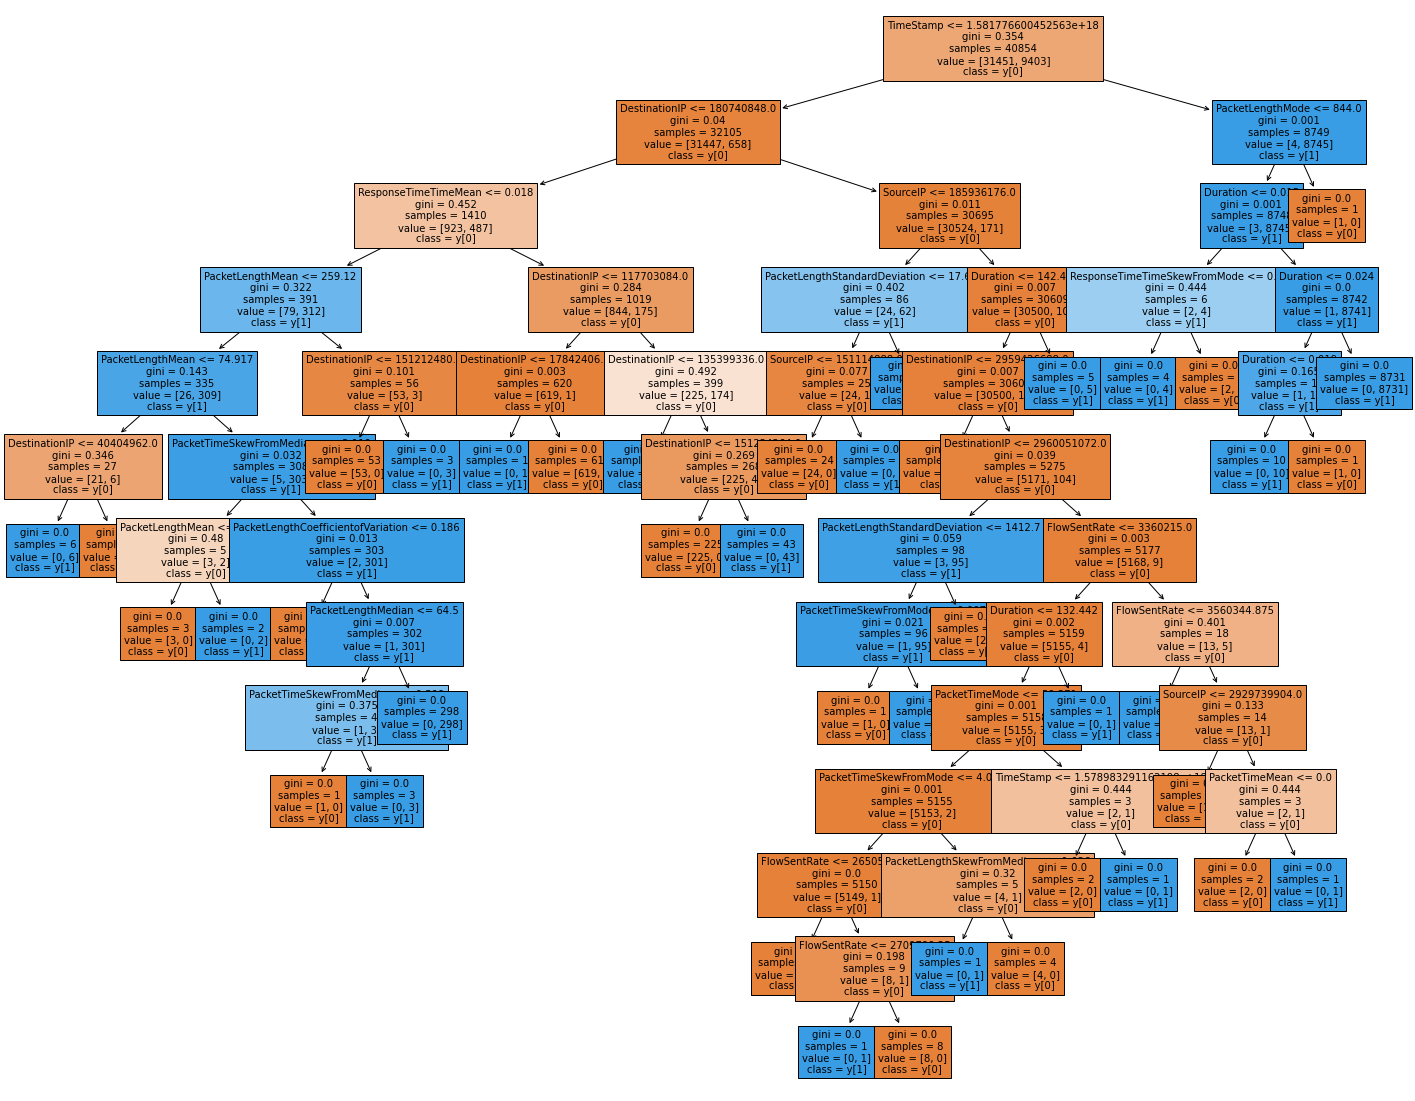

In [27]:
# gini index
X = DF_X_training.append(DF_X_testing)
plt.figure(figsize=(25,20))
tree.plot_tree(classifier_DT, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()

# SVM

In [28]:
# from sklearn import svm

In [29]:
# classifier_SVM = svm.SVC(kernel='rbf', C=1.0, degree=3, gamma='scale') #Create a svm Classifier/ Radial Basis Function


In [30]:
# classifier_SVM.fit(DF_X_training, DF_Y_training) #Train the model using the training sets

In [31]:
# Y_SVM_prediction = classifier_SVM.predict(DF_X_testing) #Predict the response for test dataset

In [32]:
# print(confusion_matrix(DF_Y_testing, Y_SVM_prediction)) #build confusion_matrix table with Y_test and Y_predict


In [33]:
# print("Accuracy:", metrics.accuracy_score(DF_Y_testing, Y_SVM_prediction)) # Model Accuracy: how much it is accurate between training and testing set


##### SVM 10%

In [34]:
from sklearn import svm

In [35]:
#Create a svm Classifier/ Radial Basis Function
classifier_SVM_10 = svm.SVC(C=5.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None) 


In [36]:
classifier_SVM_10.fit(DF_X_training, DF_Y_training) #Train the model using the training sets

SVC(C=5.0)

In [37]:
Y_SVM_prediction_10 = classifier_SVM_10.predict(DF_X_testing) #Predict the response for test dataset

In [38]:
print(confusion_matrix(DF_Y_testing, Y_SVM_prediction_10))

[[13479     2]
 [  281  3748]]


In [39]:
print("Accuracy:", metrics.accuracy_score(DF_Y_testing, Y_SVM_prediction_10)) # Model Accuracy: how much it is accurate between training and testing set


Accuracy: 0.9838378069674472


# Neural Network

In [27]:
from sklearn.neural_network import MLPClassifier

In [33]:
#Multi-layer Perceptron classifier
#This model optimizes the log-loss function using LBFGS or stochastic gradient descent.
classifier_MLP = MLPClassifier(activation='relu',solver='adam', alpha=0.0001, hidden_layer_sizes=(500,), random_state=None)


In [34]:
classifier_MLP.fit(DF_X_training, DF_Y_training) #Train the model using the training sets

MLPClassifier(hidden_layer_sizes=(500,))

In [35]:
Y_MLP_prediction = classifier_MLP.predict(DF_X_testing) #Predict the response for test dataset

In [36]:
print(confusion_matrix(DF_Y_testing, Y_MLP_prediction)) #build confusion_matrix table with Y_test and Y_predict


[[13481     0]
 [ 4029     0]]


In [37]:
print("Accuracy:", metrics.accuracy_score(DF_Y_testing, Y_MLP_prediction)) # Model Accuracy


Accuracy: 0.7699029126213592


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
classifier_RF = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=2,min_samples_leaf=1,max_features='auto')


In [48]:
classifier_RF.fit(DF_X_training, DF_Y_training) #Train the model using the training sets

RandomForestClassifier()

In [49]:
Y_RF_prediction = classifier_RF.predict(DF_X_testing) #Predict the response for test dataset

In [50]:
print(confusion_matrix(DF_Y_testing, Y_RF_prediction)) #build confusion_matrix table with Y_test and Y_predict


[[13478     3]
 [   14  4015]]


In [51]:
print("Accuracy:", metrics.accuracy_score(DF_Y_testing, Y_RF_prediction)) # Model Accuracy: how much it is accurate


Accuracy: 0.9990291262135922


# Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
classifier_GB = GradientBoostingClassifier()

In [54]:
classifier_GB.fit(DF_X_training, DF_Y_training) #Train the model using the training sets

GradientBoostingClassifier()

In [55]:
Y_GB_prediction = classifier_GB.predict(DF_X_testing) #Predict the response for test dataset

In [56]:
print(confusion_matrix(DF_Y_testing, Y_GB_prediction)) #build confusion_matrix table with Y_test and Y_predict


[[13478     3]
 [    6  4023]]


In [57]:
print("Accuracy:", metrics.accuracy_score(DF_Y_testing, Y_GB_prediction)) # Model Accuracy: how much it is accurate


Accuracy: 0.9994860079954312


# XGB (ExtremeGB)

In [58]:
from xgboost import XGBClassifier

In [59]:
classifier_XGB = XGBClassifier(booster='gbtree',verbosity=1,validate_parameters=False)

In [60]:
classifier_XGB.fit(DF_X_training, DF_Y_training) #Train the model using the training sets

[23:18:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyoh/opt/anaconda3/envs/Env_3_6/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=False, verbosity=1)

In [61]:
Y_XGB_prediction = classifier_XGB.predict(DF_X_testing) #Predict the response for test dataset

In [62]:
print(confusion_matrix(DF_Y_testing, Y_XGB_prediction)) #build confusion_matrix table with Y_test and Y_predict


[[13479     2]
 [    1  4028]]


In [63]:
print("Accuracy:", metrics.accuracy_score(DF_Y_testing, Y_XGB_prediction)) # Model Accuracy: how much it is accurate


Accuracy: 0.9998286693318104


# LGBM (LightGBM)

In [64]:
from lightgbm import LGBMClassifier


In [65]:
classifier_LGBM = LGBMClassifier()

In [66]:
classifier_LGBM.fit(DF_X_training, DF_Y_training) #Train the model using the training sets

LGBMClassifier()

In [67]:
Y_LGBM_prediction = classifier_LGBM.predict(DF_X_testing) #Predict the response for test dataset

In [68]:
print(confusion_matrix(DF_Y_testing, Y_LGBM_prediction)) #build confusion_matrix table with Y_test and Y_predict


[[13479     2]
 [    3  4026]]


In [69]:
print("Accuracy:", metrics.accuracy_score(DF_Y_testing, Y_LGBM_prediction)) # Model Accuracy: how much it is accurate


Accuracy: 0.9997144488863506
